In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import os
import glob
import sys
os.chdir("../data")
sys.path.append('home/sein/ksc_model/data/configs_new_dataset/5')
dir_list = glob.glob('configs_new_dataset/5/*.cnf')
df = pd.read_csv('configs_new_dataset/external_new_dataset/external_results_5.csv')
tplt_df = df[['tps','latency']]

print(tplt_df)

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


               tps  latency
0      9978.974602      713
1      9700.915358      878
2      9914.215118      729
3     10072.408413      638
4      9966.640708     1038
...            ...      ...
1995  10766.755588      625
1996   8593.107958     1440
1997   8217.998897     1879
1998  11236.779711      626
1999   9502.974280      774

[2000 rows x 2 columns]


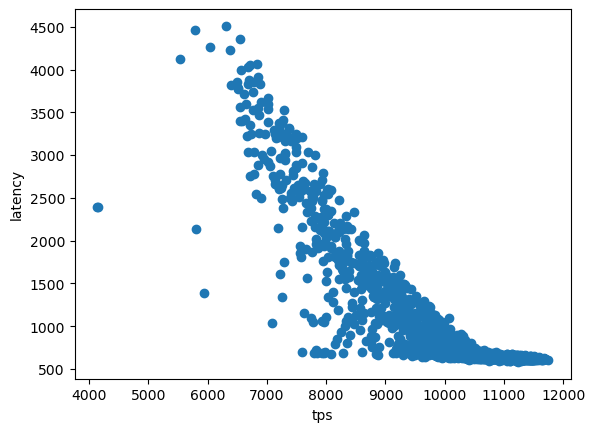

In [2]:
plt.scatter(df['tps'],df['latency'])
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

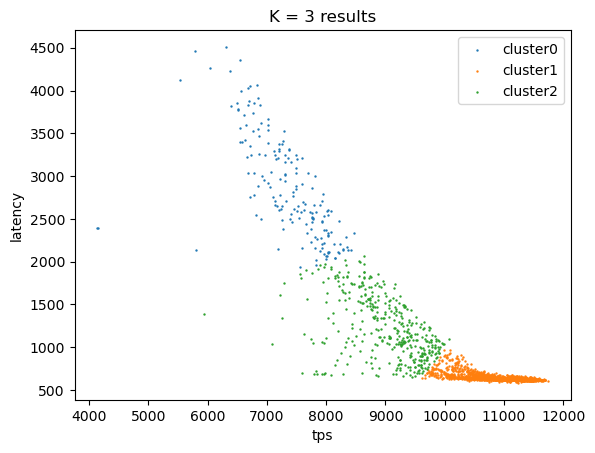

In [13]:
from sklearn.preprocessing import MinMaxScaler

#데이터 전처리 MINMAX
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(tplt_df)

k = 3

model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
tplt_df['cluster'] = model.fit_predict(data_scale)
tplt_df.to_csv("clustering_new_dataset_5.csv")
# df['cluster'] = model.fit_predict(data_scale)
# df.to_csv("clustering.csv")

for i in range(k):
    plt.scatter(df.loc[tplt_df['cluster'] == i, 'tps'], df.loc[tplt_df['cluster']==i,'latency'], 
                label = 'cluster' + str(i), s = 0.5)
    #size = s = ?

plt.legend()
plt.title('K = %d results'%k)
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [5]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

#     from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

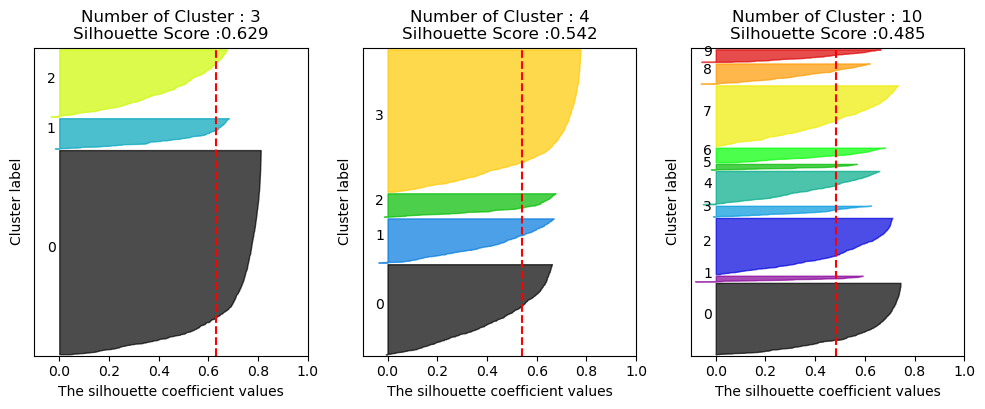

In [7]:
###cluster 개수 확인 - 실루엣 계수
import numpy as np
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3,4,10], tplt_df)

In [15]:
clus=pd.read_csv("clustering_new_dataset_5.csv", index_col=0)
# one_hot = pd.get_dummies(clus, columns=['cluster'])
# # print(one_hot)
# one_hot
print(clus)
one_hot = pd.get_dummies(clus, columns=['cluster'])
print(one_hot)

               tps  latency  cluster
0      9978.974602      713        1
1      9700.915358      878        2
2      9914.215118      729        1
3     10072.408413      638        1
4      9966.640708     1038        2
...            ...      ...      ...
1995  10766.755588      625        1
1996   8593.107958     1440        2
1997   8217.998897     1879        2
1998  11236.779711      626        1
1999   9502.974280      774        2

[2000 rows x 3 columns]
               tps  latency  cluster_0  cluster_1  cluster_2
0      9978.974602      713          0          1          0
1      9700.915358      878          0          0          1
2      9914.215118      729          0          1          0
3     10072.408413      638          0          1          0
4      9966.640708     1038          0          0          1
...            ...      ...        ...        ...        ...
1995  10766.755588      625          0          1          0
1996   8593.107958     1440          0     

In [17]:
###clustering 이후 원핫벡터

import pandas as pd
import numpy as np
import glob
import torch
from MLP import NeuralModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from cluster import make_data
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim):
# # # def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim, group_dim, Q_NUM, dot, EX_NUM=4, lamb=0.1):

#     df_pred = pd.DataFrame(columns=("METRIC", "r2",  "MSE"))

#     k_r2 = 0
#     # k_MSE = 0
#     cnt = 0


    

    # dir_list = glob.glob('../data/A-1/configs/A-1/*.cnf')
input_data = make_data('../data/configs_new_dataset/5/*.cnf')    
clus=pd.read_csv("../data/clustering_new_dataset_5.csv", index_col=0)
# rfin_array = np.array(fin_list).astype(float)
# input_data = torch.tensor(rfin_array)

# one_hot = pd.get_dummies(clus, columns=['cluster'])

#input_data = data

X = input_data #config 파일
# print(X)
# quit()

# Y = one_hot #one-hot vector 값
# print(Y)

# Y = clus.iloc[:,2:].astype(int)
    
# Y = Y.iloc[:,3:]
# Y.columns = ["cluster_0", "cluster_1", "cluster_2"]
#Y.columns = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
# Y.columns = ["cluster_0", "cluster_1", "cluster_2","cluster_3","cluster_4","cluster_5"]
#print(Y)
Y

,cluster
0,1
1,2
2,1
3,1
4,2
...,...
1995,1
1996,2
1997,2
1998,1


In [ ]:
# cluster_0 = Y["cluster_0"]
# cluster_1 = Y["cluster_1"]
# cluster_2 = Y["cluster_2"]
# cluster_3 = Y["cluster_3"]
# cluster_4 = Y["cluster_4"]


cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
#cluster_4 = []
# cluster_5 = []



for idx, y in enumerate(Y.itertuples()):
   
    if y[1]==1:
        cluster_0.append(X[idx])
    elif y[2]==1:
        cluster_1.append(X[idx])
    elif y[3]==1:
        cluster_2.append(X[idx])
    # elif y[4]==1:
    #     cluster_3.append(X[idx])
    # elif y[5]==1:
    #     cluster_4.append(X[idx])
    # else:
    #    cluster_4.append(X[idx])

    

print("cluster_0:",len(cluster_0))
print("cluster_1:",len(cluster_1))
print("cluster_2:",len(cluster_2))
# print("cluster_3:",len(cluster_3))

print("SUM:", len(cluster_0)+len(cluster_1)+len(cluster_2))
#print("SUM:", len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3))
# print("cluster_4:",len(cluster_4))
# print(len(cluster_5))





RandomForest

In [88]:
######################################################################수정
import os
import utils
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from cluster import make_data

def KmeanClustering(data, k):
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'navy'
        elif label == 1:
            color = 'tomato'
        elif label == 2:
            color = 'green'
        elif label == 3:
            color = 'orange'
        plt.scatter(np_external[i,0],np_external[i,1], color=color)

    plt.xlabel('tps')
    plt.ylabel('latency')
    plt.show()
    return labels

def get_data(knob_path, external_path, i, num, wk):
    for i in range(10):
        KNOB_PATH = (f'../data/configs_new_dataset/{i}')
        # raw_knobs_list=[]    
        for num in range(2000):
            #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
            raw_knobs = make_data(os.path.join(KNOB_PATH, f'my_{num}.cnf'))
            raw_knobs = pd.DataFrame(raw_knobs)
            # raw_knobs_list.append(raw_knobs)
    # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
        # raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
        # raw_knobs = pd.raw_knobs
        # print(10)
        # quit()
    
    #raw_knobs = utils.mysql_knob_dataframe(wk, KNOB_PATH)
    #데이터프레임으로 config 불러옴
    
    #EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')
    EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
    for i in range(10):
        external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{i}.csv'), index_col=0)
    latency_columns = []
    for col in external_.columns:
        if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
            latency_columns.append(col)
    external = external_[['tps']].copy()
    external['latency'] = external_[latency_columns].max(axis=1)
    return raw_knobs, external


In [1]:
#원본
import os
import utils
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from cluster import make_data
import configparser

def mysql_knob_dataframe(wk, KNOB_PATH):
    KNOB_PATH = os.path.join(KNOB_PATH, str(wk))
    config_len = len(os.listdir(KNOB_PATH))
    cnf_parser = configparser.ConfigParser()
    pd_mysql = pd.DataFrame()
    for idx in range(config_len):
        cnf_parser.read(os.path.join(KNOB_PATH, f'my_{idx}.cnf'))
        conf_dict = cnf_parser._sections['mysqld']
        tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
        pd_mysql = pd.concat([pd_mysql, tmp])
        
    pd_mysql = pd_mysql.reset_index(drop=True)
    pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
    return pd_mysql

def KmeanClustering(data, k):
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'navy'
        elif label == 1:
            color = 'tomato'
        elif label == 2:
            color = 'green'
        elif label == 3:
            color = 'orange'
        plt.scatter(np_external[i,0],np_external[i,1], color=color)

    plt.xlabel('tps')
    plt.ylabel('latency')
    plt.show()
    return labels

def get_data(knob_path, external_path, wk):
    raw_knobs = mysql_knob_dataframe(wk, knob_path)
    
    external_ = pd.read_csv(os.path.join(external_path, f'external_results_{wk}.csv'), index_col=0)
    latency_columns = []
    for col in external_.columns:
        if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
            latency_columns.append(col)
    external = external_[['tps']].copy()
    external['latency'] = external_[latency_columns].max(axis=1)
    return raw_knobs, external

def get_class_num(data):
    cls, cnt = np.unique(data, return_counts=True)
    print(f'# of the largest class / # of data = {max(cnt) / sum(cnt)}')
    for _ in range(len(cls)):
        print(f'{cls[_]} : {cnt[_]}')

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
# KNOB_PATH = (f'../data/configs_new_dataset')


# # raw_knobs_list=[]    
# wk = 1
# #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
# raw_knobs = mysql_knob_dataframe(wk, KNOB_PATH)
# raw_knobs

,table_open_cache,innodb_buffer_pool_size,innodb_buffer_pool_instances,innodb_purge_threads,innodb_read_io_threads,innodb_write_io_threads,innodb_adaptive_hash_index,innodb_flush_neighbors,innodb_io_capacity,innodb_lru_scan_depth,innodb_random_read_ahead,innodb_read_ahead_threshold,innodb_spin_wait_delay,innodb_sync_array_size,innodb_sync_spin_loops,innodb_thread_concurrency,metadata_locks_hash_instances,table_open_cache_instances,thread_cache_size,tmp_table_size
0,7961,4110465923,27,21,38,11,0,1,1564122,6794,1,1,34,383,90,12,187,27,103,814312919
1,6852,7513665853,40,10,55,40,0,0,226153,9331,0,44,48,339,67,40,613,57,799,37154826
2,4275,1102142987,11,11,15,21,1,1,1372132,362,0,53,25,617,14,38,386,35,749,948220072
3,4132,7309104409,8,22,3,42,0,0,602222,7636,0,23,9,3,7,25,857,51,492,77182985
4,2317,487864148,35,21,29,40,1,1,130963,1901,0,63,25,306,64,73,443,23,289,289694632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6223,1262480733,8,14,2,1,1,1,1980558,3244,0,58,3,454,95,20,662,50,452,258236048
1996,138,211966523,49,29,43,27,0,0,242452,7135,0,12,24,460,98,63,505,20,795,656527327
1997,3931,8421356727,37,17,53,11,1,1,851896,6110,0,50,30,279,93,61,555,44,610,729298449
1998,6680,7026434922,7,15,11,61,0,1,1059044,2069,1,2,19,1018,37,34,775,38,138,825486649


In [8]:
# #수정
# import os
# import utils
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# from sklearn.metrics import davies_bouldin_score
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from cluster import make_data
# import configparser

# def mysql_knob_dataframe(wk, KNOB_PATH):
#     KNOB_PATH = os.path.join(KNOB_PATH, str(wk))
#     config_len = len(os.listdir(KNOB_PATH))
#     cnf_parser = configparser.ConfigParser()
#     pd_mysql = pd.DataFrame()
#     for idx in range(config_len):
#         cnf_parser.read(os.path.join(KNOB_PATH, f'my_{idx}.cnf'))
#         conf_dict = cnf_parser._sections['mysqld']
#         tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
#         pd_mysql = pd.concat([pd_mysql, tmp])
        
#     pd_mysql = pd_mysql.reset_index(drop=True)
#     pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
#     return pd_mysql

# def get_data(KNOB_PATH, EXTERNAL_PATH, wk):

#     KNOB_PATH = (f'../data/configs_new_dataset/{wk}')
#     # raw_knobs_list=[]    

#     #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#     raw_knobs = make_data(KNOB_PATH)
#     raw_knobs = pd.DataFrame(raw_knobs)
#     print(type(raw_knobs))
#     # raw_knobs_list.append(raw_knobs)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         # raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#         # raw_knobs = pd.raw_knobs
#         # print(10)
#         # quit()
    
#     #raw_knobs = utils.mysql_knob_dataframe(wk, KNOB_PATH)
#     #데이터프레임으로 config 불러옴
    
#     #EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')
#     EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
#     external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{wk}.csv'), index_col=0)
#     latency_columns = []
#     for col in external_.columns:
#         if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#             latency_columns.append(col)
#     external = external_[['tps']].copy()
#     external['latency'] = external_[latency_columns].max(axis=1)
#     return raw_knobs, external

In [100]:
# def mysql_knob_dataframe(wk, knobs_path):
#     knobs_path = os.path.join(knobs_path, str(wk))
#     config_len = len(os.listdir(knobs_path))
#     cnf_parser = configparser.ConfigParser()
#     pd_mysql = pd.DataFrame()
#     for idx in range(config_len):
#         cnf_parser.read(os.path.join(knobs_path, f'my_{idx}.cnf'))
#         conf_dict = cnf_parser._sections['mysqld']
#         tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
#         pd_mysql = pd.concat([pd_mysql, tmp])
        
#     pd_mysql = pd_mysql.reset_index(drop=True)
#     pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
#     return pd_mysql

In [ ]:
#############################################################
# for i in range(10):
#         KNOB_PATH = (f'../data/configs_new_dataset/{i}')
#         # print(KNOB_PATH)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         raw_knobs_list = []
#         for num in range(2000):
#             #raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#             raw_knobs = make_data(os.path.join(KNOB_PATH, f'my_{num}.cnf'))
#             # print(raw_knobs.type)
#             raw_knobs_ = pd.DataFrame(raw_knobs)
#             raw_knobs_list.append(raw_knobs)
#             # raw_knobs = pd.raw_knobs
#             print(raw_knobs_list)
#             # print(raw_knobs_.type)

In [3]:
#############################################################
# EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
# for wk in range(10):
#     external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{wk}.csv'), index_col=0)
# latency_columns = []
# for col in external_.columns:
#     if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#         latency_columns.append(col)
# external = external_[['tps']].copy()
# external['latency'] = external_[latency_columns].max(axis=1)
# print(external)   

              tps  latency
0     2103.142511     2071
1     2332.073324     1982
2     2401.571570     1826
3     2417.250149     1994
4     1975.451662     2692
...           ...      ...
1995  2408.629619     1842
1996  2479.992644     1991
1997  2077.754788     2615
1998  2475.077015     1982
1999  2473.372370     1841

[2000 rows x 2 columns]


In [31]:
# !pwd

/home/sein/ksc_model/model


In [2]:
# KNOB_PATH = os.path.join('..','data', 'configs_new_dataset')
# EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')

K-means Clustering

===================0 workload===================


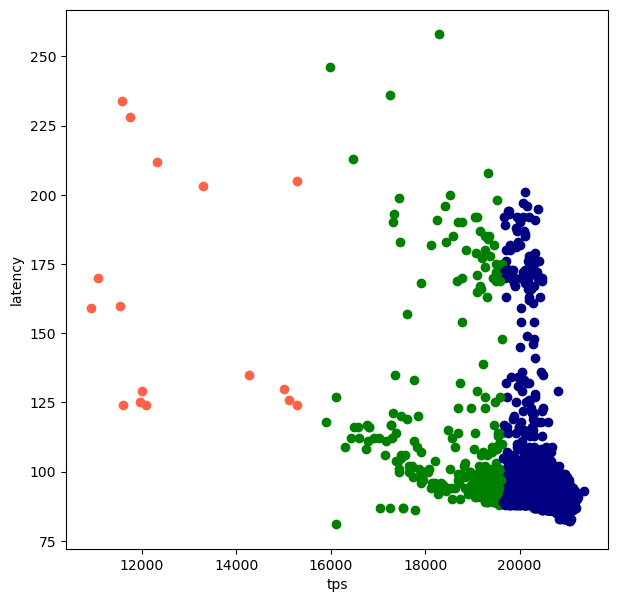

0 : 1688
1 :   16
2 :  296
score = 2.251321761713268
===================1 workload===================


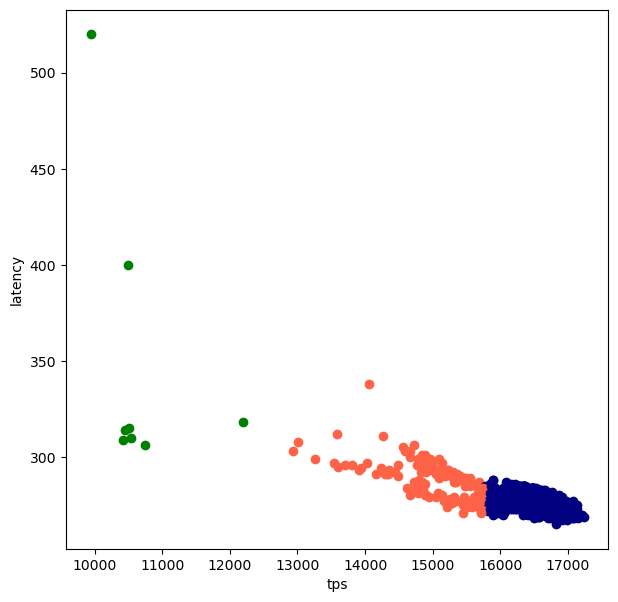

0 : 1850
1 :  142
2 :    8
score = 10.375969963049888
===================2 workload===================


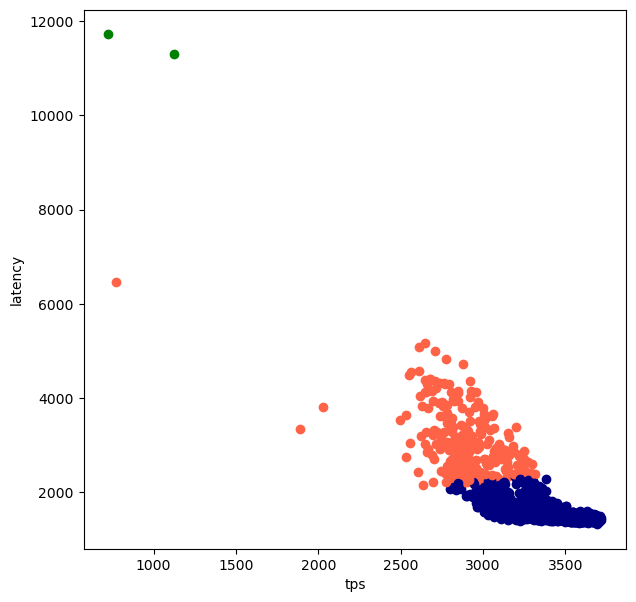

0 : 1771
1 :  227
2 :    2
score = 14.394475327182219
===================3 workload===================


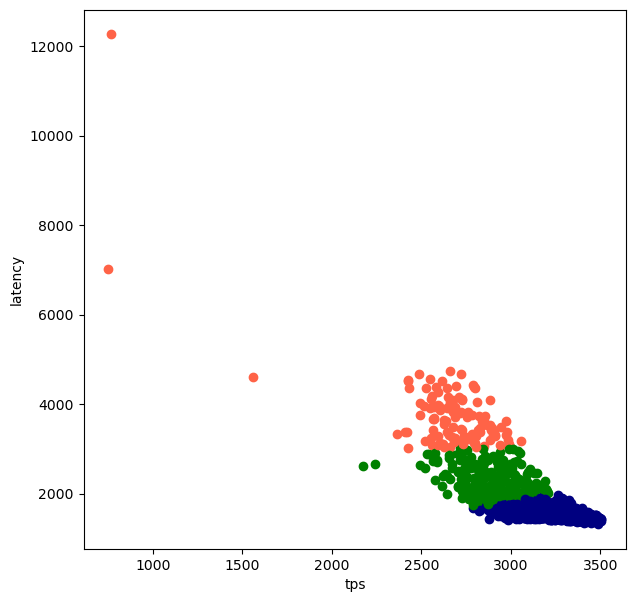

0 : 1634
1 :  115
2 :  251
score = 22.995357051782992
===================4 workload===================


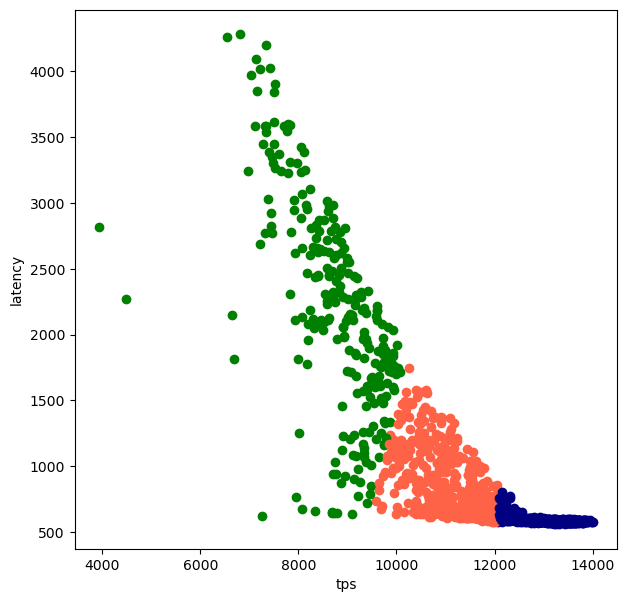

0 : 1198
1 :  536
2 :  266
score = 112.68457220572043
===================5 workload===================


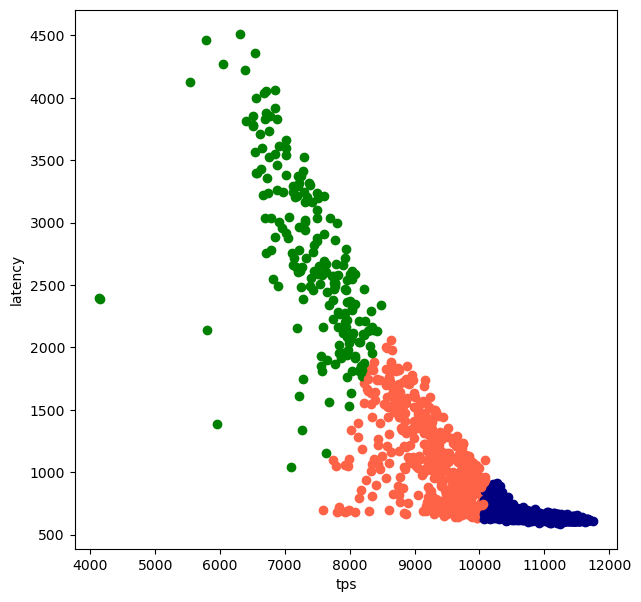

0 : 1352
1 :  447
2 :  201
score = 27.724409382198942
===================6 workload===================


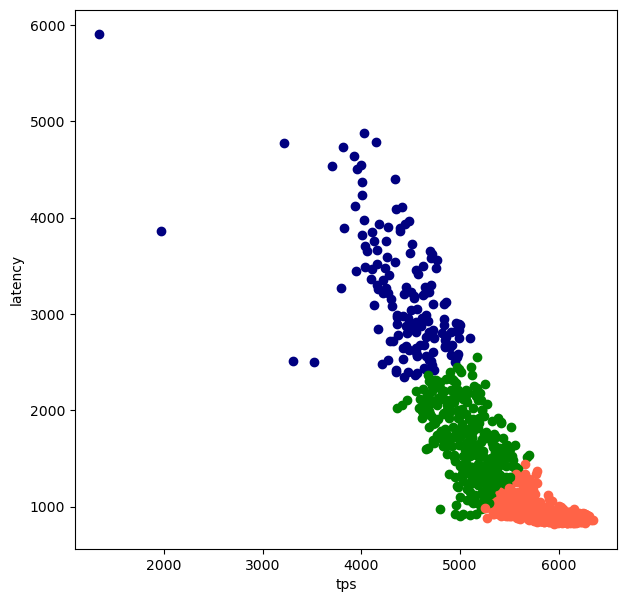

0 :  151
1 : 1503
2 :  346
score = 31.17233388278203
===================7 workload===================


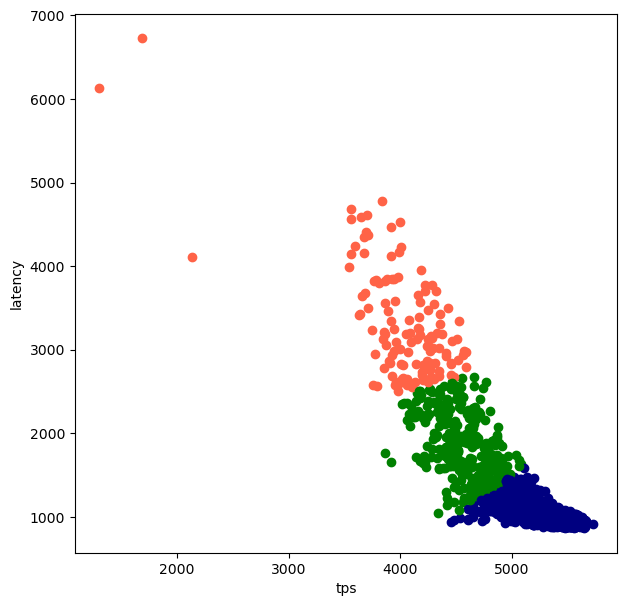

0 : 1554
1 :  130
2 :  316
score = 57.89027719191406
===================8 workload===================


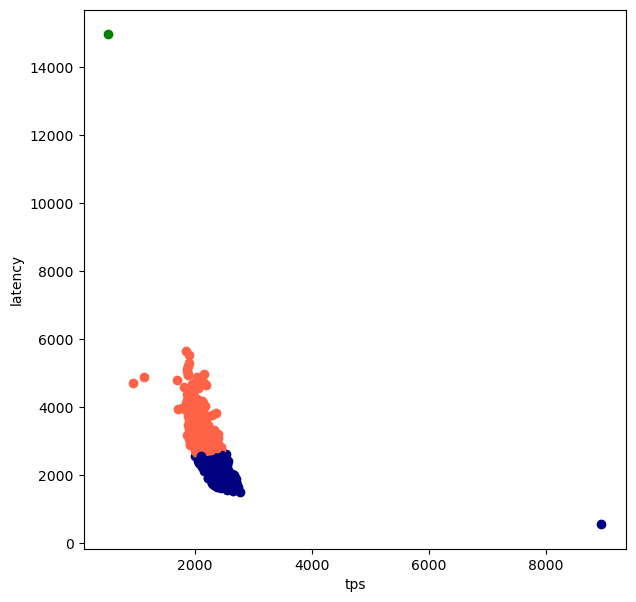

0 : 1792
1 :  207
2 :    1
score = 13.175148006417865
===================9 workload===================


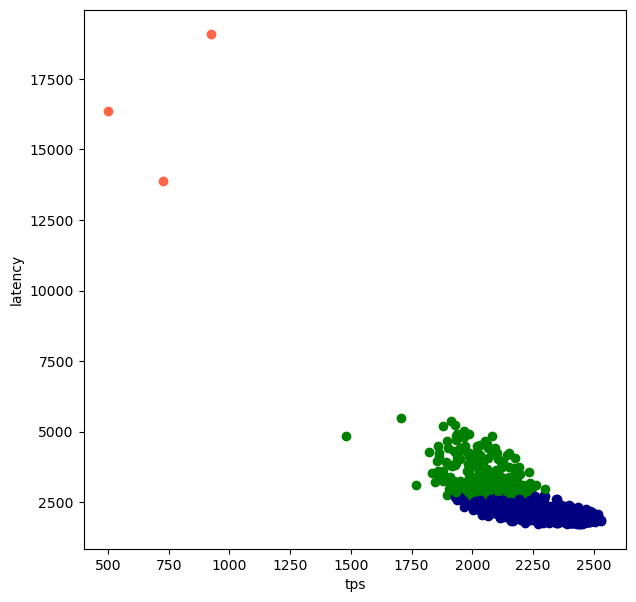

0 : 1791
1 :    3
2 :  206
score = 16.101706978101365


In [2]:
# import get_data
# import KmeanClustering

KNOB_PATH = ('../data/configs_new_dataset')
EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
for wk in range(10):
    print(f'==================={wk} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 3)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}')
    print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

===================0 workload===================


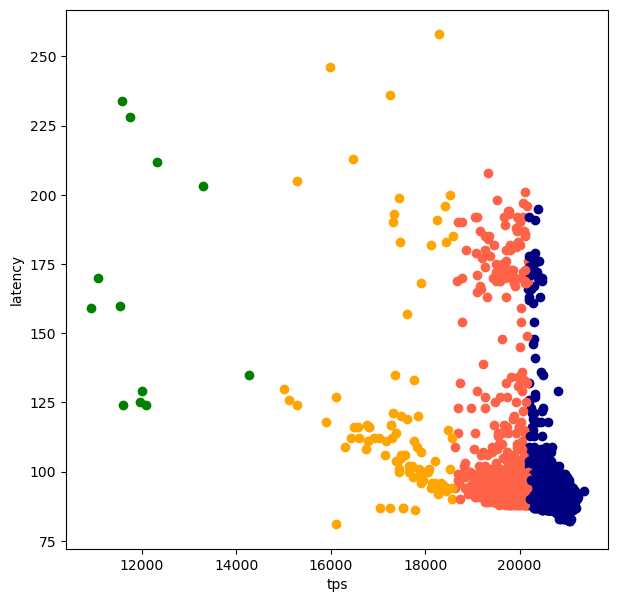

0 : 1284
1 :  611
2 :   12
3 :   93
score = 4.449505167158934
===================1 workload===================


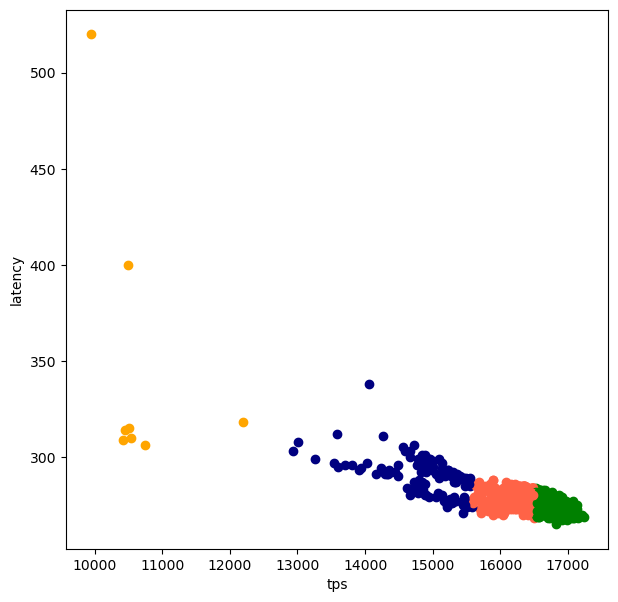

0 :  122
1 :  822
2 : 1048
3 :    8
score = 7.6113338702965585
===================2 workload===================


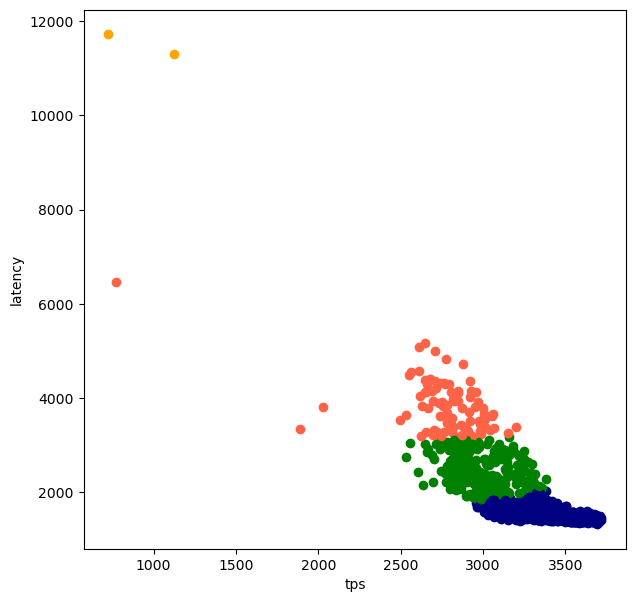

0 : 1691
1 :   91
2 :  216
3 :    2
score = 44.42926341538451
===================3 workload===================


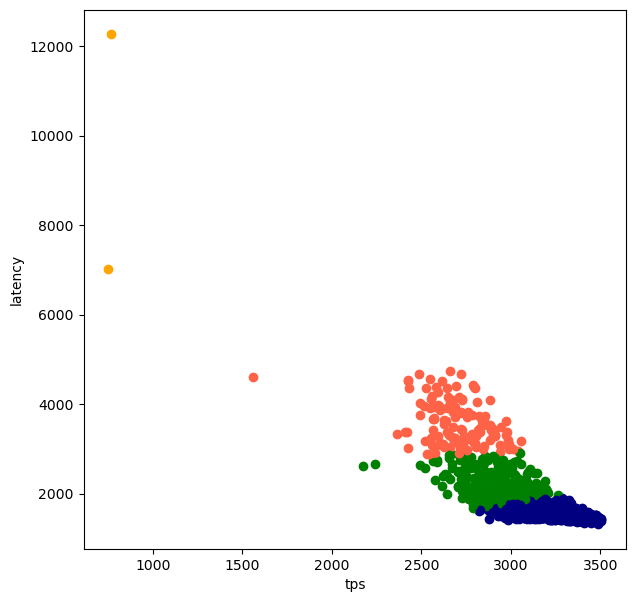

0 : 1617
1 :  125
2 :  256
3 :    2
score = 123.78136144983452
===================4 workload===================


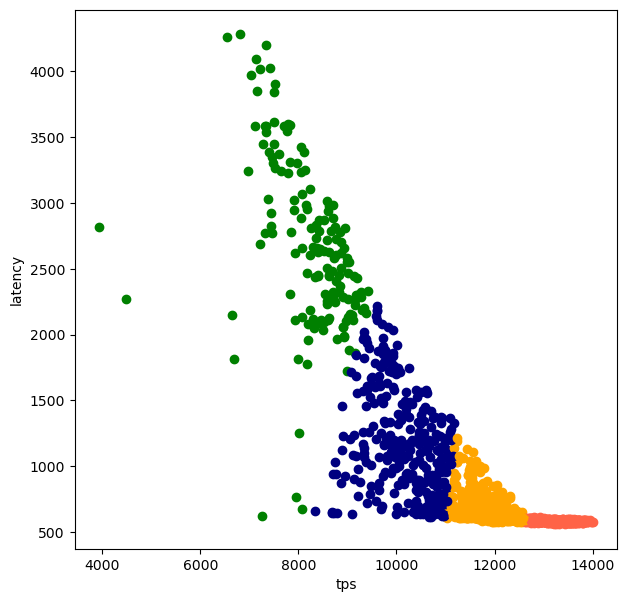

0 :  325
1 :  817
2 :  156
3 :  702
score = 149.67620679958156
===================5 workload===================


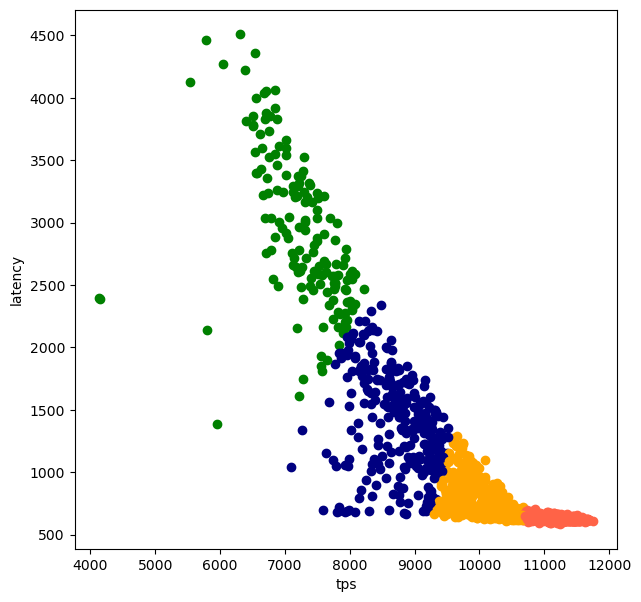

0 :  295
1 :  948
2 :  157
3 :  600
score = 30.47512468435816
===================6 workload===================


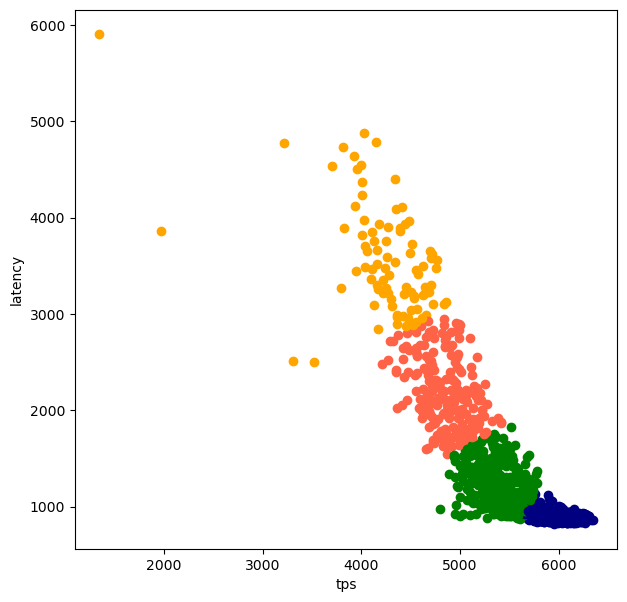

0 : 1246
1 :  219
2 :  446
3 :   89
score = 32.406245035678566
===================7 workload===================


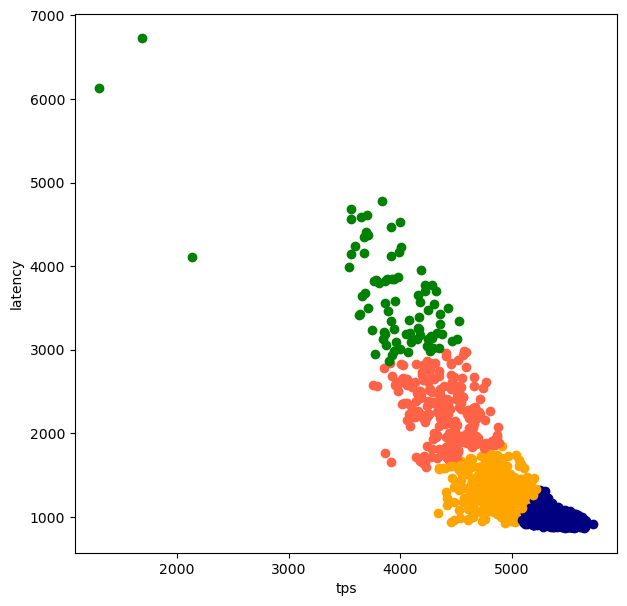

0 : 1231
1 :  229
2 :   84
3 :  456
score = 288.05034603436707
===================8 workload===================


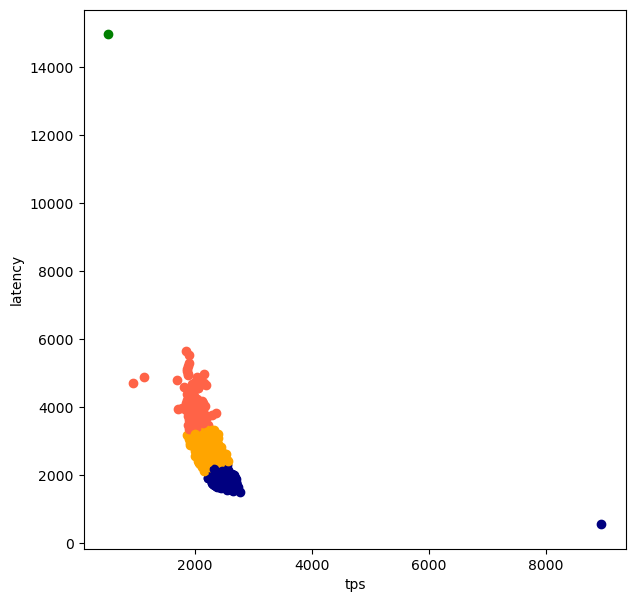

0 : 1671
1 :   99
2 :    1
3 :  229
score = 24.16010223454561
===================9 workload===================


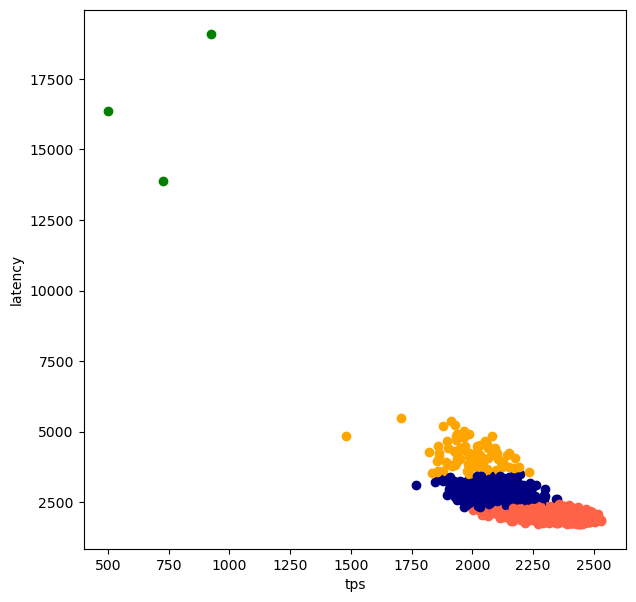

0 :  243
1 : 1670
2 :    3
3 :   84
score = 118.10060456799447


In [3]:
for wk in range(10):
    print(f'==================={wk} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 4)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}\n{cls[3]} : {cnt[3]:4}')
    print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

In [7]:
def get_class_num(data):
    cls, cnt = np.unique(data, return_counts=True)
    print(f'# of the largest class / # of data = {max(cnt) / sum(cnt)}')
    for _ in range(len(cls)):
        print(f'{cls[_]} : {cnt[_]}')

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score


for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    #clf = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=0)
    clf = RandomForestClassifier(n_estimators=1000, max_depth = 32, random_state = 0,n_jobs=-1)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ',balanced_accuracy_score(y_test, pred))
    
    

=WK0===============================================================
0 : 606
1 : 93
2 : 1289
3 : 12
********true********
0 : 244
1 : 42
2 : 512
3 : 2
********pred********
0 : 222
1 : 32
2 : 546
accuracy:  0.885
balanced accuracy:  0.6164526005074161
=WK1===============================================================
0 : 1048
1 : 122
2 : 822
3 : 8
********true********
0 : 423
1 : 52
2 : 320
3 : 5
********pred********
0 : 496
1 : 44
2 : 260
accuracy:  0.78125
balanced accuracy:  0.5688071126568467
=WK2===============================================================
0 : 216
1 : 1691
2 : 91
3 : 2
********true********
0 : 82
1 : 679
2 : 38
3 : 1
********pred********
0 : 76
1 : 707
2 : 17
accuracy:  0.93875
balanced accuracy:  0.5295250320924262
=WK3===============================================================
0 : 256
1 : 127
2 : 1615
3 : 2
********true********
0 : 102
1 : 49
2 : 648
3 : 1
********pred********
0 : 72
1 : 41
2 : 687
accuracy:  0.92875
balanced accuracy:  0.5944952054896032
=W

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    clf = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=0)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.83375
0 : 667
1 : 124
2 : 9
********pred********
# of the largest class / # of data = 0.84125
0 : 673
1 : 124
2 : 3
accuracy:  0.93
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.93375
0 : 747
1 : 48
2 : 5
********pred********
# of the largest class / # of data = 0.9475
0 : 758
1 : 42
accuracy:  0.98125
=WK2===============================================================
# of the largest class / # of data = 0.8855
0 : 227
1 : 1771
2 : 2
********true********
# of the largest class / # of data = 0.875
0 : 100
1 : 700
********pred********
# of the largest class / # of data = 0.92625
0 : 59
1 : 741
accuracy:  0.94875
=WK3==================================

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    clf = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=0)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.8475
0 : 678
1 : 113
2 : 9
********pred********
# of the largest class / # of data = 0.88125
0 : 705
1 : 92
2 : 3
accuracy:  0.93375
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.935
0 : 748
1 : 49
2 : 3
********pred********
# of the largest class / # of data = 0.9425
0 : 754
1 : 46
accuracy:  0.97875
=WK2===============================================================
# of the largest class / # of data = 0.8855
0 : 1771
1 : 227
2 : 2
********true********
# of the largest class / # of data = 0.87125
0 : 697
1 : 102
2 : 1
********pred********
# of the largest class / # of data = 0.92375
0 : 739
1 : 61
accuracy:  0.945
=WK3=============================

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    clf = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=0)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    
    

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


=WK0===============================================================


NameError: name 'get_data' is not defined